## Observations and Insights 

In [ ]:
## Observations
# 1) Ifubinol is the least effective
# 2) Mouse f966 experienced successful results in tumor volumereduction
# 3) Ceftamin has the largest range in effectiveness
# 4) Larger mice on the Capomulin regimen have larger tumors

In [241]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure 
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mice_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [242]:
# Checking the number of mice.
mice = mice_combined_df["Mouse ID"].nunique()
mouse_count

249

In [243]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_combined_df.loc[mice_combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [244]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = pd.DataFrame(duplicate_mice)
duplicate_mice_all


,0
0,g989


In [266]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_combined_df[mice_combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [246]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = clean_df['Mouse ID'].nunique()
cleaned_mouse_count

248

## Summary Statistics

In [247]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({"Mean":mean,
                                   "Median":median,
                                   "Variance":var,
                                   "STD":std,
                                   "SEM":sem})
summary_statistics



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [248]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Tested')

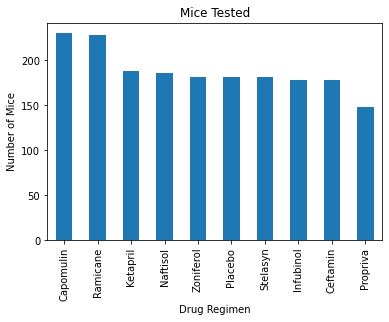

In [249]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

pandas_plot = mice_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Tested")

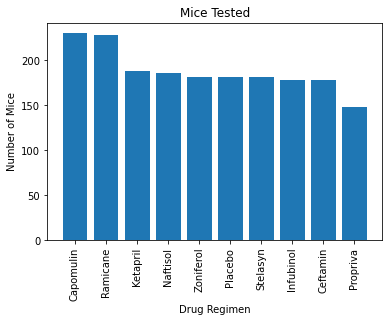

In [250]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, align='center')
plt.title("Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


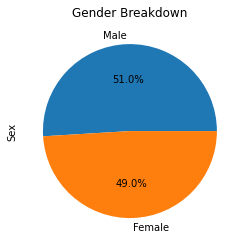

In [251]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_df["Sex"].value_counts()
plt.title("Gender Breakdown")
gender_pie.plot.pie(autopct="%1.1f%%")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

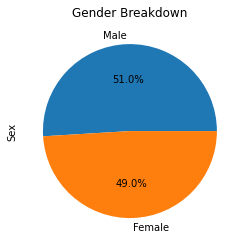

In [252]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plot = gender_pie.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.title("Gender Breakdown")
plt.ylabel("Sex")
plt.show


## Quartiles, Outliers and Boxplots

Capomulin
Ramicane
Infubinol
Ceftamin
------------------------------------------------------------
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The IQR of Capomulin is: 7.78
Values below 20.71 might be Capomulin outliers.
Values above 51.83 might be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The IQR of Ramicane is: 9.1
Values below 17.91 might be Ramicane outliers.
Values above 54.31 might be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The IQR of Infubinol is: 11.48
Values below 36.83 might be Infubinol outliers.
Values above 82.75 might be Infubinol outliers.
--------------------------------

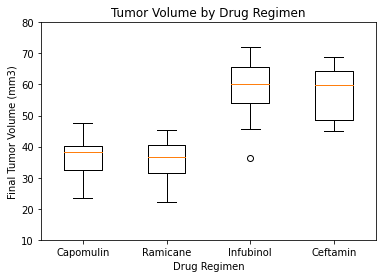

In [294]:
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_regimen_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_vol=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_regimen_list:
    print(drug)
    
treatment_list = 0
for drug in drug_regimen_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment_list == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The IQR of {drug} is: {iqr}")
    print(f"Values below {lower_bound} might be {drug} outliers.")
    print(f"Values above {upper_bound} might be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

box_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

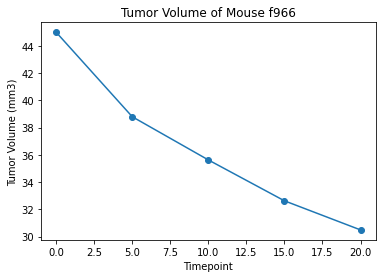

In [278]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "f966",:]
capomulin_line_df.head()

x_axis = capomulin_line_df["Timepoint"]
tumor_size = capomulin_line_df["Tumor Volume (mm3)"]

plt.title('Tumor Volume of Mouse f966')
plt.plot(x_axis, tumor_size, marker="o")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

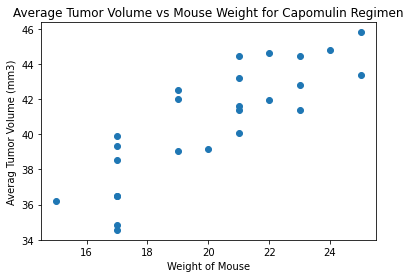

In [285]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin_vol =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight of Mouse')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [291]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.84


In [ ]:
x_values = avg_capomulin_vol['Weight (g)']
y_values = avg_capomulin_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept

